# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
salaries = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
salaries["Salary or Hourly"].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
salaries["Department"].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [7]:
# Nuestra hipótesis nula es: el salario/ por hora es de 30$/h
# Intervalo de confianza = 95% 

In [8]:
salaries.rename(columns={'Salary or Hourly': 'Salary_or_Hourly'}, inplace = True)

In [9]:
Hourly_Rate = salaries[salaries.Salary_or_Hourly == "Hourly"]["Hourly Rate"]
Hourly_Rate

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hourly Rate', ylabel='Density'>

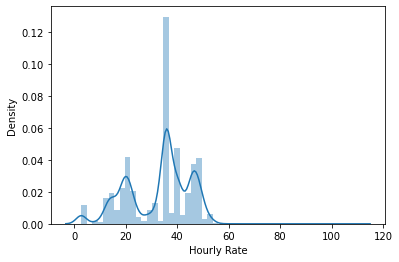

In [10]:
sns.distplot(Hourly_Rate) #no sigue una distribución normal, pero aun así "asumimos" que si

In [12]:
sm = np.mean(Hourly_Rate) #media de la muestra
sm

32.78855771628128

In [13]:
m = 30

In [14]:
stats.ttest_1samp(Hourly_Rate,m)
#El p-value es inferior a 0,05 así que rechazaríamos la hipótesis nula

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [15]:
# Ahora hablamos de one sided tail, porqué estamos analisando si el salario es MAYOR. El t-test de scipy solo sirve para 2 sided tests, así que el resultado del p-value tendremos que dividirlo por dos para poder hacer la comparación 
# Hipótesis nula: Los salarios de este año no son iguales a los del año pasado

salaries_police = salaries[(salaries.Salary_or_Hourly == "Salary") & (salaries.Department == "POLICE")]["Annual Salary"]
salaries_police

0        101442.0
1         94122.0
9         93354.0
11        84054.0
12        87006.0
           ...   
33177     72510.0
33178     72510.0
33179     48078.0
33180     90024.0
33181     93354.0
Name: Annual Salary, Length: 13404, dtype: float64

In [16]:
sm = np.mean(salaries_police) #media de la muestra 
sm

86486.41450313339

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Salary', ylabel='Density'>

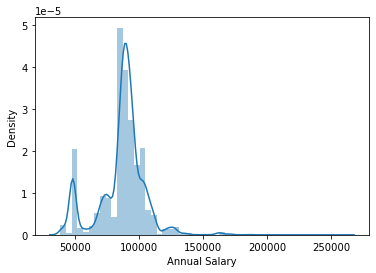

In [17]:
sns.distplot(salaries_police) #esta parece un poquito más normal

In [18]:
m = 86000

In [19]:
stats.ttest_1samp(salaries_police,m)
# el pvalue / 2 es inferior a 0,05 --> rechazamos la hipótesis nula de que los salarios son iguales 
# podemos afirmar que no solo no son iguales, sino que estos son superiores a 86k, ya que el estadístico ha dado positivo. 
# Rechazamos la hipótesis nula, lo que significa que el jefe de policia tenía razón. 

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [20]:
pd.crosstab(salaries.Department, salaries.Salary_or_Hourly).sort_values(by="Hourly", ascending = False).head(1)
#the department with most hourly workers is "Streets & San"

Salary_or_Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [21]:
salaries_streetssan = salaries[(salaries.Salary_or_Hourly == "Hourly") & (salaries.Department == "STREETS & SAN")]["Hourly Rate"]
salaries_streetssan

7        35.60
21       21.43
24       35.60
36       36.21
39       35.60
         ...  
33106    36.13
33107    35.60
33147    35.60
33149    36.21
33156    22.12
Name: Hourly Rate, Length: 1862, dtype: float64

In [22]:
sm = np.mean(salaries_streetssan)
sm

33.728378088076845

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hourly Rate', ylabel='Density'>

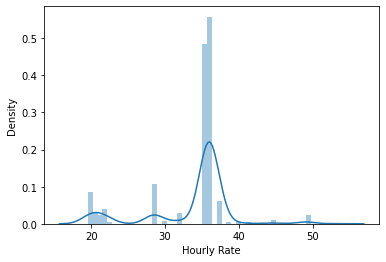

In [23]:
sns.distplot(salaries_streetssan)

In [24]:
m = 35

In [25]:
stats.ttest_1samp(salaries_streetssan,m)

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21)

In [26]:
# Nuestra hipótesis nula es que la media del salario de los trabajadores a este departamento es igual que la media de nuestra muestra 
# Nuestro p-value/2 es inferior a 0,05 lo que significa que rechazamos nuestra hipótesis nula (las medias no son iguales) y además podemos afirmar que la media es inferior a 35/hora, ya que nuestro estadístico ha dado negativo.  

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [33]:
Hourly_Rate

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [34]:
sm = np.mean(Hourly_Rate)
sm #media de la muestra 

32.78855771628128

In [35]:
n = len(Hourly_Rate) #tamaño de la muestra 
n

8022

In [36]:
se = stats.sem(Hourly_Rate)
se #standard error

0.1352368565101596

In [37]:
from scipy.stats import t
from scipy.stats import sem

In [38]:
t.interval(0.95, (n-1) , loc=sm, scale=se)

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [39]:
salaries_police

0        101442.0
1         94122.0
9         93354.0
11        84054.0
12        87006.0
           ...   
33177     72510.0
33178     72510.0
33179     48078.0
33180     90024.0
33181     93354.0
Name: Annual Salary, Length: 13404, dtype: float64

In [40]:
sm = np.mean(salaries_police)
sm

86486.41450313339

In [41]:
n = len(salaries_police) #tamaño de la muestra 
n

13404

In [42]:
se = stats.sem(salaries_police)
se

157.82445675052244

In [43]:
t.interval(0.95, (n-1) , loc=sm, scale=se) 
#tenemos un 95% de confianzade que le media de los salarios de los policias está nte 86.177€ y 86.795€

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [44]:
from statsmodels.stats.proportion import proportions_ztest

In [45]:
# hipótesis nula: el número de hourly workers en la ciudad de Chicago es de un 25% 

In [46]:
sample_proportion = salaries.Salary_or_Hourly.value_counts(normalize=True)[1]
sample_proportion

0.24175029382515142

In [50]:
sample_success = salaries.Salary_or_Hourly.value_counts()[1]
sample_success

8022

In [51]:
sample_size = len(salaries.Salary_or_Hourly)
sample_size

33183

In [52]:
stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=0.25)
stat, p_value

(-3.5099964213703005, 0.0004481127249057967)

In [53]:
#el pvalue es inferior a 0,05, lo que significa que rechazamos la hipótesis nula, es decir, si que es diferente a un 25%